### Dimensionality Reduction
http://setosa.io/ev/principal-component-analysis/
https://plot.ly/ipython-notebooks/principal-component-analysis/

There are two types of **Dimensionality Reduction** techniques:

    1. Feature Selection
    2. Feature Extraction

Why should we look at dimensionality reduction?
    - Speeds up algorithms
    - Reduces space used by data for them

What is dimensionality reduction?
    - So you've collected many features - maybe more than you need
    - Can you "simply" your data set in a rational and useful way?
Example:
    - Redundant data set - different units for same attribute
    - Reduce data to 1D (2D->1D)


As an aside, you should normally do mean normalization and feature scaling on your data before PCA

A bad use of PCA: Use it to prevent over-fitting

I am certain that in most cases, PCA does not work well in datasets that only contain categorical data.

There are other data reduction methods you can try to compress the data like **multiple correspondence analysis** and **categorical PCA** etc.

###  Feature scaling
**Feature scaling** (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

#### 1. Scaling
In scaling (also called min-max scaling), you transform the data such that the features are within a specific range e.g. [0, 1].

$$ x'=\dfrac{x-x_{min}}{x_{max}-x_{min}}. $$

**Scaling**  is important in the algorithms such as support vector machines (SVM) and k-nearest neighbors (KNN) where distance between the data points is important. 

#### 2.Normalization

The point of **normalization** is to change your observations so that they can be described as a normal distribution.


$$ x'=\dfrac{x-x_{mean}}{x_{max}-x_{min}}. $$


#### 3.Standardization
*Standardization* (also called z-score normalization) transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ x'=\dfrac{x-x_{mean}}{\sigma}, $$

where $\sigma$ is its standard deviation.

#### Applications
In stochastic gradient descent, feature scaling can sometimes improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors.

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
df = pd.read_csv('Wine.csv')

### Review data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


### Split data into the independent vs dependent variables

In [6]:
X = df.iloc[:,[0,13]].values
y = df.iloc[:,13].values

### Split data into train and test sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc_X = StandardScaler()

In [11]:
X_train = sc_X.fit_transform(X_train)

In [12]:
X_test = sc_X.fit_transform(X_test)

In [13]:
X_train

array([[ 0.87668336,  1.30503589],
       [-0.36659076,  0.02700074],
       [-1.69689407,  0.02700074],
       [ 0.51613387,  1.30503589],
       [ 0.64046128, -1.2510344 ],
       [ 0.92641433, -1.2510344 ],
       [-0.8639004 ,  0.02700074],
       [-0.47848543,  0.02700074],
       [-1.95798163,  0.02700074],
       [ 0.81451966, -1.2510344 ],
       [-0.47848543,  1.30503589],
       [-1.27418086,  0.02700074],
       [-0.91363137,  1.30503589],
       [ 1.63508058, -1.2510344 ],
       [-0.13036867,  1.30503589],
       [ 0.62802854,  1.30503589],
       [ 0.71505773, -1.2510344 ],
       [ 1.68481154,  1.30503589],
       [ 0.90154885, -1.2510344 ],
       [-0.95092959,  0.02700074],
       [ 0.35450823,  1.30503589],
       [ 0.21774808,  1.30503589],
       [ 1.08803996,  0.02700074],
       [-0.1676669 ,  1.30503589],
       [ 1.06317448,  1.30503589],
       [ 0.39180646, -1.2510344 ],
       [ 0.08098793,  0.02700074],
       [-0.5903801 ,  1.30503589],
       [-0.8639004 ,

### Applying PCA

In [14]:
from sklearn.decomposition import PCA

Firstly, we should choose number of extracted features (<code>n_components</code>) being 'None'. From this, we can see the variance ratio according of the number of exteacted feature.

In [15]:
pca = PCA(n_components = None) #n_components : nb of extracted feature we want to get

In [16]:
X_train = pca.fit_transform(X_train)

In [17]:
X_test = pca.transform(X_test)

In [18]:
explained_variance = pca.explained_variance_ratio_ #eigenvalues

In [19]:
print(explained_variance)

[0.6512042 0.3487958]


Now, we choose the number of extracted features we want,

In [20]:
pca = PCA(n_components = 2)

In [21]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
explained_variance = pca.explained_variance_ratio_ #eigenvalues

In [23]:
print(explained_variance)

[0.6512042 0.3487958]


### Fitting Logistic Regression to the Tranining set


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression(random_state=0)

In [26]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the Test set results

In [27]:
y_pred = classifier.predict(X_test)

### Making the confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[14,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  6]])

### Visualising the  Training set results

In [31]:
from matplotlib.colors import ListedColormap

In [32]:
X_set, y_set = X_train, y_train

In [33]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.699478153598908, 3.1105218464009683)

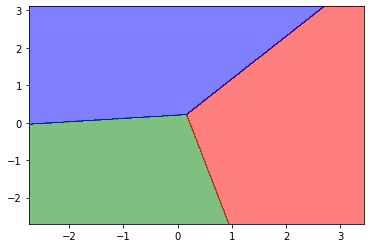

In [34]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


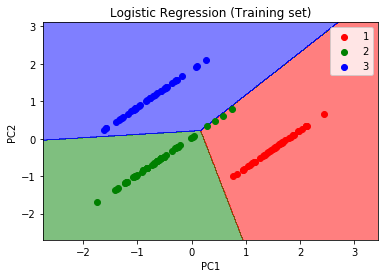

In [35]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green','blue'))(i),label =j  )
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

In [36]:
from matplotlib.colors import ListedColormap

In [37]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.0642530622683894, 2.9057469377315046)

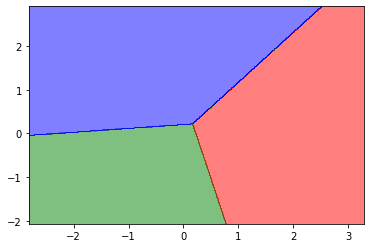

In [38]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


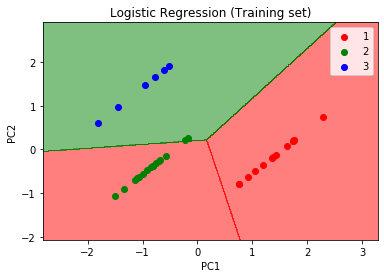

In [39]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green','blue'))(i),label =j  )
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()